In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import clr

In [2]:
# clr.AddReference(r"C:\Users\panagop\.nuget\packages\exceldna.addin\1.6.0-preview3\tools\net452\ExcelDna.Integration.dll")
# clr.AddReference(r"D:\mycsharp_projects\CsStrEng\bin\Debug\net6.0-windows\MathNet.Numerics.dll")
clr.AddReference(r"D:\mycsharp_projects\CsStrEng\bin\Release\net6.0-windows\win-x64\CsStrEng.dll")

# clr.AddReference("System.Windows.Forms")

In [3]:
import CsStrEng

ModuleNotFoundError: No module named 'CsStrEng'

In [5]:
import CsStrEng.Arrays

ModuleNotFoundError: No module named 'CsStrEng'

In [6]:
from System.Reflection import Assembly
assem = Assembly.LoadFile(r"D:\mycsharp_projects\CsStrEng\bin\Release\net6.0-windows\win-x64\CsStrEng.dll")
for module in assem.GetModules():
    for name in module.GetTypes():
        print(name.FullName)

Microsoft.CodeAnalysis.EmbeddedAttribute
System.Runtime.CompilerServices.NullableAttribute
System.Runtime.CompilerServices.NullableContextAttribute
CsStrEng.Arrays
CsStrEng.Vulnerability.Lognormal
CsStrEng.Maths.Common
CsStrEng.Maths.Numerics.Integration
CsStrEng.Maths.Numerics.Interpolation
CsStrEng.Civil.Statics.BeamKnownSupportMomentsUniformLoadExcel
CsStrEng.Civil.Statics.BeamKnownSupportMomentsUniformLoad
CsStrEng.Civil.Statics.Matrix
CsStrEng.Civil.Concrete.Beams.Flexure
CsStrEng.Civil.Codes.EN1998_1_2004.Ch3.GroundTypes
CsStrEng.Civil.Codes.EN1998_1_2004.Ch3.SeismicAction
CsStrEng.Civil.Codes.EN1992_1_1_2004.Ch6.Shear
CsStrEng.Civil.Codes.EN1992_1_1_2004.Ch4.ConcreteCover
CsStrEng.Civil.Codes.EN1992_1_1_2004.Ch3.Concrete.Strength
CsStrEng.Civil.Codes.EN1992_1_1_2004.Ch3.Concrete.ElasticDeformation
CsStrEng.Civil.Codes.EN1992_1_1_2004.Ch3.Concrete.σεforNLA
CsStrEng.Civil.Codes.EN1992_1_1_2004.Ch3.Concrete.σεforDesign
<PrivateImplementationDetails>
<PrivateImplementationDetails>+_

In [15]:
from CsStrEng.Arrays import *

ModuleNotFoundError: No module named 'CsStrEng'

In [10]:
print(dir())

['Form', 'In', 'Out', '_', '_3', '_6', '_7', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i10', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'clr', 'exit', 'f', 'get_ipython', 'math', 'np', 'open', 'pd', 'plt', 'quit']


In [60]:
lw = 6.00       # Πλάτος διατομής τοιχώματος
hw = 28.50      # Ύψος τοιχώματος
hs = 4.12       # Καθαρό ύψος του ορόφου πάνω από τη βάση του τοιχώματος

hi = np.array([4.5] + [3]*8)        # Ύψη ορόφων

M_calcs_bot = np.array([6893.6, 4160.7, 3037.1, 2061.1, 1149.5, 527.1, -37.9, -350.0, -363.3])
M_calcs_top = np.array([3894.5, 2658.3, 1740.1, 812.5, 178.6, -382.9, -679.9, -685.8, -262.8])


In [63]:
n_storeys = len(hi)                 # Αριθμός ορόφων
zi = np.cumsum(hi)                  # Στάθμες ορόφων ορόφων
H = zi[-1]                          # Ύψος κτιρίου

print('Ύψη ορόφων: ', list(hi))
print('Αριθμός ορόφων: ', n_storeys)
print('Στάθμες ορόφων: ', list(zi))
print(f'Ύψος κτιρίου: {H:.2f}m')

Ύψη ορόφων:  [4.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Αριθμός ορόφων:  9
Στάθμες ορόφων:  [4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5]
Ύψος κτιρίου: 28.50m


Το ύψος της κρίσιµης περιοχής hcr πάνω από τη βάση των τοιχωµάτων θα λαµβάνεται σύµφωνα µε την ακόλουθη σχέση:

$h_{cr} = \max \left \{
     \begin{array}{ c l }
     l_w \\
     h_w/6
     \end{array}
    \right.$

αλλά θα πρέπει:

$h_{cr} \le  \left \{
     \begin{array}{ l l }
     2\cdot l_w \\
          \left \{
          \begin{array}{ l l }
          h_s  & \quad \textrm{για } n \leq 6 \textrm{ ορόφους} \\
          2\cdot h_s  & \quad \textrm{για } n \geq 7 \textrm{ ορόφους}
          \end{array}
          \right.
     \end{array}
    \right.$

In [55]:
hcr = max(lw, hw/6)
print(f'hcr = {hcr:.2f} m')

hcr_check = min(2*lw, hs if n_storeys<=6 else 2*hs)
print(f'hcr_check = {hcr_check:.2f} m')

# Ελέγχουμε αν η τιμή του hcr είναι μικρότερη από τον έλεγχο
if hcr > hcr_check:
    hcr > hcr_check

print(f'Μετά τον έλεγχο, hcr = {hcr:.2f} m')

hcr = 6.00 m
hcr_check = 8.24 m
Μετά τον έλεγχο, hcr = 6.00 m


Είναι πιθανό το ύψος της κρίσιµης περιοχής που υπολογίστηκε να αντιστοιχεί σε όλο τμήμα κάποιου ορόφου (π.χ. ολόκληρος ο πρώτος όροφος και τμήμα του δεύτερου). 
Επειδή οι απαιτήσεις όπλισης της κρίσιµης περιοχής διαφέρουν από αυτές της εκτός κρισίµου περιοχής, είναι προφανές πως από πρακτικής απόψεως, δεν είναι εύκολο να επιτευχθεί µια τέτοια διαφοροποίηση των
οπλισµών µέσα στο ύψος ενός ορόφου. 
Συνεπώς είναι προτιµότερο να ληφθεί ως κρίσιµη περιοχή αυτή που αντιστοιχεί στο ύψος ολόκληρων των σχετικών ορόφων.

In [56]:
hcr = zi[np.where(np.greater_equal(zi, hcr))[0][0]]     # Βρίσκω τη στάθμη του πρώτου ορόφου που βρίσκεται σε ύψος μεγαλύτερο ή ίσο του hcr
print(f'Τελικά hcr = {hcr:.2f} m')

Τελικά hcr = 7.50 m


In [73]:
M0 = M_calcs_bot[0]
Mn = np.abs(M_calcs_top[-1])

print(f'M0 = {M0:.2f} kNm')
print(f'Mn = {Mn:.2f} kNm')

M0 = 6893.60 kNm
Mn = 262.80 kNm


$M_{Ed}(z_i) = (M_0 - M_n)\cdot(1 - \dfrac{z_i-h_{cr}}{H}) + M_n  \text{για} z_i\ge h_{cr}$

$M_{Ed} = M_0 \text{για} z_i\lt h_{cr}$

In [74]:
MEd = (M0 - Mn) * (1 - (zi - hcr)/H) + Mn
MEd

array([7591.57894737, 6893.6       , 6195.62105263, 5497.64210526,
       4799.66315789, 4101.68421053, 3403.70526316, 2705.72631579,
       2007.74736842])

In [75]:
np.greater_equal(zi, hcr)

array([False,  True,  True,  True,  True,  True,  True,  True,  True])

In [85]:
condition = np.less(zi, hcr)
MEd = np.array([M0] + [M0 if condition else (M0 - Mn) * (1 - (zi - hcr)/H) + Mn for condition, zi in zip(condition, zi)])
MEd

array([6893.6       , 6893.6       , 6893.6       , 6195.62105263,
       5497.64210526, 4799.66315789, 4101.68421053, 3403.70526316,
       2705.72631579, 2007.74736842])

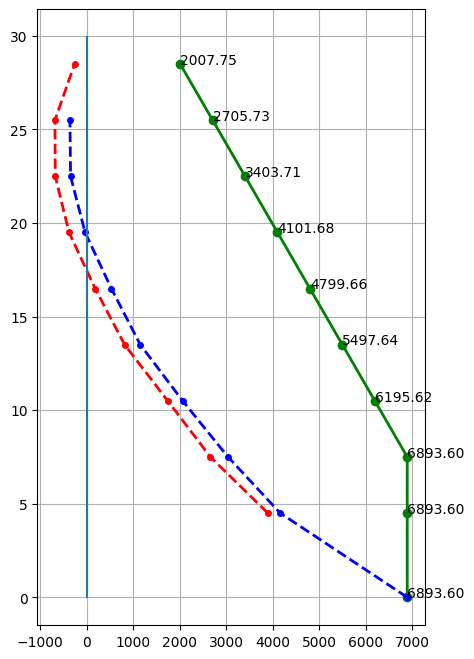

In [131]:
fig, ax = plt.subplots(figsize=(5, 8))

xs = MEd
ys = np.append(np.array([0]), (zi))

xs_bot = M_calcs_bot
ys_bot = zi - hi

xs_top = M_calcs_top
ys_top = zi

plt.plot(xs, ys, 'go-', linewidth=2, markersize=6)
plt.plot(xs_bot, ys_bot, 'bo--', linewidth=2, markersize=4)
plt.plot(xs_top, ys_top, 'ro--', linewidth=2, markersize=4)
plt.plot([0., 0.], [0, 1.05*ys_top[-1]])
plt.grid()
for index in range(len(xs)):
  ax.text(xs[index], ys[index], f'{xs[index]:.2f}', size=10
  )

In [93]:
len(MEd)

10

In [130]:
zi

array([ 4.5,  7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5])

In [98]:
np.append(np.array([0]), (zi))

array([ 0. ,  4.5,  7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5])

$μ_φ = 2\cdot q_0 \cdot \dfrac{M_{Ed}}{M_{Rd}} -1 $

$μ_φ = 1 + 2 \cdot (q_0 \cdot \dfrac{M_{Ed}}{M_{Rd}} -1 ) \cdot \dfrac{T_C}{T_1} $

$α \cdot ω_{wd} \ge 30 \cdot μ_φ \cdot (ν_d + ω_v) \cdot e_{sy,d} \cdot \dfrac{b_c}{b_0} - 0.035 $